# Baseball Win Prediction

## Data Description

To develop an algorithm that predicts the number of wins for a team in the 2015 season based on several different indicators of success in Major League Baseball datasets

Import required libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('Baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Data has been imported and we can see the first 5 rows of the data using df.head() function

## EDA

In [3]:
df.shape

(30, 17)

In [5]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

There are integer and float values

In [3]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [5]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In columns H,AB,HR mean is higher than median

Standard Deviation is higher in R,AB,H,BB,SO,SB,RA

Here we can see the complete description about the data


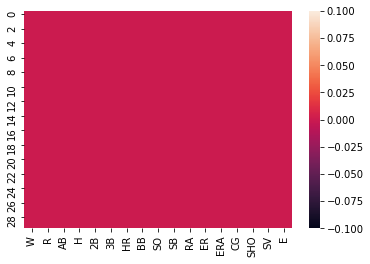

In [6]:
sns.heatmap(df.isnull())

There are no null values

In [7]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no null values

In [8]:
dfcor=df.corr()
dfcor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


This represents the correlation between the data

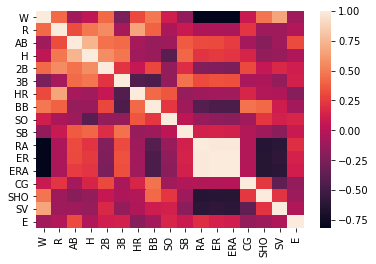

In [12]:
sns.heatmap(dfcor)

RA,ER and ERA are positively correlated with each other

Win is negatively correlated with RA,ER and ERA

Win is positively correlated with R,HR,SHO,SV

This map shows the correlation between the data

In [9]:
collist=df.columns.values
ncol=12
nrows=10

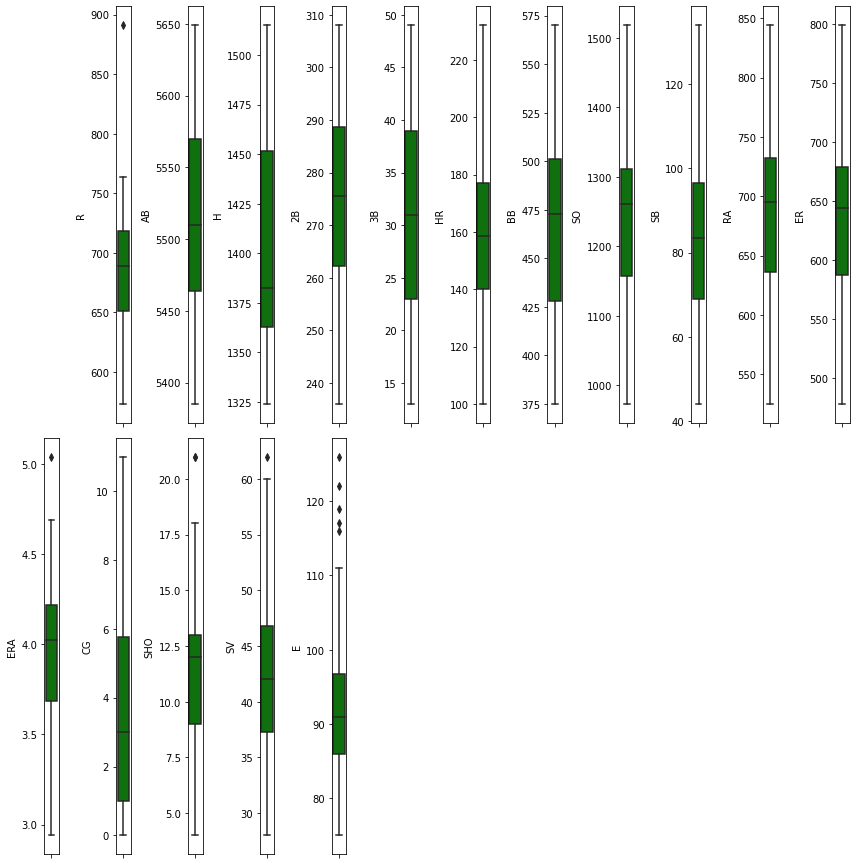

In [10]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

There are few outliers in E which must be removed

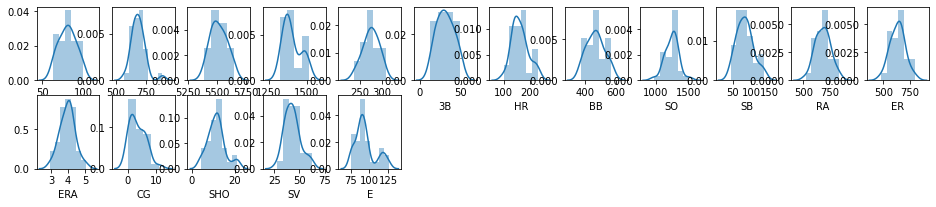

In [11]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

There are skewness in 2B,HR,SO,SB,RA,CG,SHO,SV,E

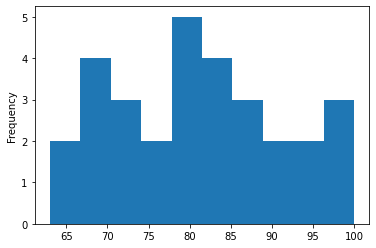

In [12]:
df['W'].plot.hist()

Frequency of Wins

80 has the highest frequency

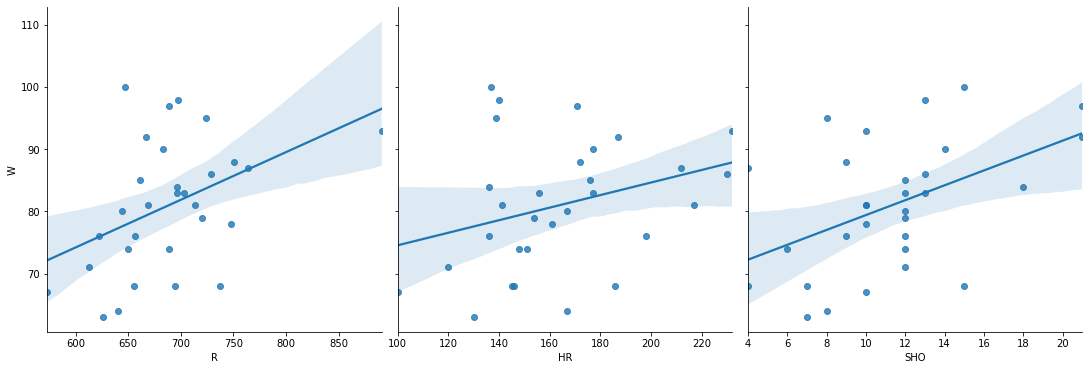

In [76]:
sns.pairplot(df, x_vars=['R', 'HR', 'SHO'], y_vars='W', size=5, aspect=1, kind='reg')

In this plot we can see the graph of Win vs R,HR and SHO

## Removing Outliers

In [42]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [43]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [44]:
z[5][1]

3.5096470447193067

In [45]:
df_new=df[(z<3).all(axis=1)]

In [46]:
df.shape

(30, 17)

In [47]:
df_new.shape

(29, 17)

## Checking Skewness

In [48]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

As we can see there is no huge skewness in data so we will not be performing transformaton techniques

In [49]:
x=df_new.drop("W",axis=1)

In [50]:
y=df_new["W"]

In [51]:
x.tail()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [52]:
y.tail()

25    92
26    84
27    79
28    74
29    68
Name: W, dtype: int64

## Finding the best Random State

In [53]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    DT=DecisionTreeRegressor()
    DT.fit(x_train,y_train)
    predrf=DT.predict(x_test)
    acc=r2_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Score is",maxAccu," on Random_state",maxRS)

Best Score is 0.8850816227573945  on Random_state 23


## Creating Train Test split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=23)

In [55]:
model=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),SVR()]

In [57]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Mean squared error',mean_squared_error(y_test,predm))
    print('Square root of Mean squared error',np.sqrt(mean_squared_error(y_test,predm)))
    print('Mean absolute error',mean_absolute_error(y_test,predm))
    print('Print R2 score',r2_score(y_test,predm)) 
    print('\n')

Mean squared error 37.32267760281129
Square root of Mean squared error 6.1092288877411765
Mean absolute error 5.681304011913168
Print R2 score 0.7348780512412652


Mean squared error 109.14285714285714
Square root of Mean squared error 10.447145885018411
Mean absolute error 8.285714285714286
Print R2 score 0.22470281240939394


Mean squared error 36.95598571428575
Square root of Mean squared error 6.079143501702008
Mean absolute error 4.564285714285717
Print R2 score 0.7374828501014784


Mean squared error 151.24336571075023
Square root of Mean squared error 12.298104151077524
Mean absolute error 10.12996481468216
Print R2 score -0.07435849809028161




## Cross Validation

In [58]:
svr=SVR()
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
svrscores = cross_val_score(svr,x,y,cv=5)
print(svrscores.mean())

-0.428726106026213


In [61]:
dtscores = cross_val_score(dt,x,y,cv=5)
print(dtscores.mean())

-2.6180390938089517


In [62]:
rfscores = cross_val_score(rf,x,y,cv=5)
print(rfscores.mean())

-0.7783815742408147


In [63]:
lrscores = cross_val_score(lr,x,y,cv=5)
print(lrscores.mean())

0.0376286604965234


It is observed that only Linear Regression is working best in this model

## Hyper parameter Tunning

In [64]:
from sklearn.model_selection import GridSearchCV

In [70]:
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

In [67]:
parameters= {'n_jobs':np.arange(2,15),
            'copy_X':['intercept_','coef_']}

In [68]:
GCV=GridSearchCV(LinearRegression(),parameters,cv=5)

In [69]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': ['intercept_', 'coef_'],
                         'n_jobs': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [71]:
GCV.best_params_

{'copy_X': 'intercept_', 'n_jobs': 2}

In [72]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [73]:
r2_score(y_test,GCV_pred)

0.7348780512412652

## Saving the best Model

In [74]:
import joblib
joblib.dump(GCV.best_estimator_,"MBLwin.pkl")

['MBLwin.pkl']